In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
from matplotlib import cm
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import *

In [2]:
casenames = [
    'KPP-CVMix',
    'KPPLT-LF17',
    'KC04-MY',
    'KC04-k-omega',
    'KC04-MY-NS',
    'KC04-k-omega-NS',
    ]

labels = {
    'KPP-CVMix':       'KPP-CVMix',
    'KPPLT-LF17':      'KPPLT-LF17',
    'KC04-MY':         'KC04-MY',
    'KC04-k-omega':    'KC04-$k$-$\omega$',
    'KC04-MY-NS':      'KC04-MY w/o Stokes',
    'KC04-k-omega-NS': 'KC04-$k$-$\omega$ w/o Stokes',
    }

casedir0 = '../OSMOSIS-Winter'
casedir = '../gotm/run/OSMOSIS-Winter-KC04'
for cn in ['KPP-CVMix', 'KPPLT-LF17']:
    if not os.path.islink(os.path.join(casedir, cn)):
        os.symlink(os.path.join(casedir0, cn), os.path.join(casedir, cn))
save_fig = True

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sim = Simulation(path=casedir+'/'+case)
    sims[case] = sim
    dataset[case] = sim.load_data()

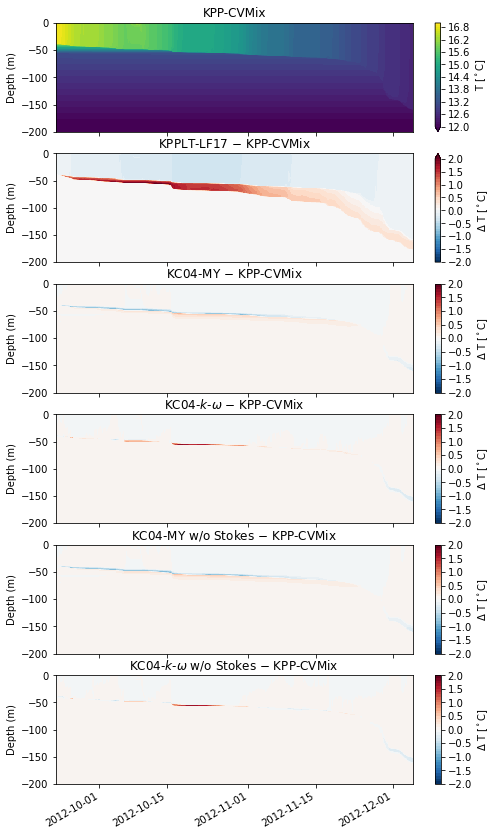

In [4]:
nc = len(casenames)
fig, axarr = plt.subplots(nc, sharex='col')
fig.set_size_inches(8, 2*(nc+1))
data0 = sims[casenames[0]].load_data()
levels = np.linspace(12, 17, 51)
data0.temp.attrs['long_name'] = 'T'
data0.temp.attrs['units'] = '$^\circ$C'
data0.temp.plot(ax=axarr[0], levels=levels)
axarr[0].set_title(labels[casenames[0]])
levels_diff = np.linspace(-2, 2, 41)
for i in np.arange(nc-1):
    j = i+1
    diff = sims[casenames[j]].load_data().temp - data0.temp
    diff.attrs['long_name'] = '$\Delta$ '+ data0.temp.attrs['long_name']
    diff.attrs['units'] = data0.temp.attrs['units']
    diff.plot(ax=axarr[j], levels=levels_diff)
    axarr[j].set_title(labels[casenames[j]]+' $-$ '+labels[casenames[0]])
for i in np.arange(nc):
    axarr[i].set_xlabel('')
    axarr[i].set_ylabel('Depth (m)')